# Tranporte

### Importacion de librerias

Se importa la librerias de Pandas y Numpy para el manejo del dataframe
Se importa matplotlib para generar las graficas
Se importa ipython para mostrar el dataframe en formato tabla

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

### Importacion de archivos (google colab)

In [3]:
from google.colab import files


In [4]:
files.upload()

Saving accidentes.csv to accidentes.csv


{'accidentes.csv': b"Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age\r\n2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child\r\n2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown\r\n2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital \xe2\x80\x93 Reported Serious Injury or Severity Unknown,Onboard Injuries,Passenger,Male,Elderly\r\n2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital \xe2\x80\x93 Reported Serious Injury or Severity Unknown,Onboard Injuries,Passenger,Male,Elderly\r\n2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderl

In [5]:
csv_path = r'./accidentes.csv'

In [6]:
datos = pd.read_csv (
    csv_path,
    sep = ',',
    header = 0
)

### Lectura de csv

Se crea una variable con la direccion del CSV y luego se utiliza en el siguiente paso: la lectura del CSV.
Por ultimo se transforma el CSV leido a formato DataFrame

In [7]:
csv_path = r'./datos/accidentes.csv'

In [8]:
datos = pd.read_csv (
    csv_path,
    sep = ',',
    header = 0
)

FileNotFoundError: ignored

In [10]:
df = pd.DataFrame(datos)

## ETL

### Ordenamiento de registros

Se ordenan los registros por las columnas de año y mes 

In [25]:
def mes(valor):
    valor = valor[3:5]
    return int(valor)

In [26]:
def anio(valor):
    valor = pd.to_datetime(valor)
    return valor.year

In [31]:
#Creacion de la columna mes a partir de la fecha
df['Month'] = df['Date Of Incident'].apply(mes)

In [32]:
#Ordenamiento 
df = df.sort_values(by = ['Year', 'Month'])

In [34]:
#Reindexacion de las columnas por orden de importancia
df = df[['Year', 'Month', 'Route', 'Incident Event Type', 'Operator', 'Borough', 'Group Name']]

### Limpieza de duplicados

In [12]:
df = df.drop_duplicates()

### Limpieza de elementos vacios

In [13]:
df = df.dropna()

In [14]:
df.drop(df[(df['Route'] == '(blank)')].index, inplace=True)

## BI

Se respondera a preguntas de negocio, tomando como fuente los datos y graficos generados con los mismos

### Incidentes por año y meses

#### Año

In [35]:
X = df['Year'].unique()

In [40]:
Y = df.groupby(["Year"])["Incident Event Type"].count()

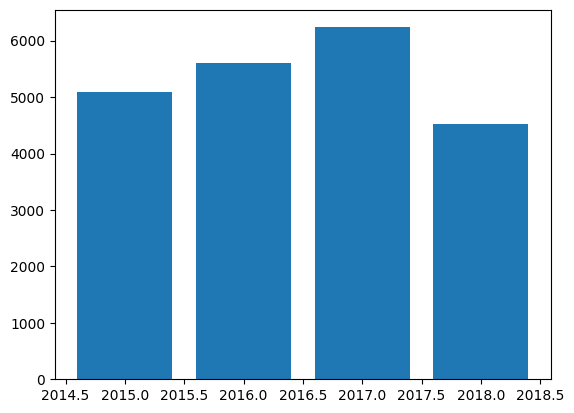

In [41]:
plt.bar(X, Y)
plt.show()

#### Mes

In [42]:
X = df['Month'].unique()

In [43]:
Y = df.groupby(["Month"])["Incident Event Type"].count()

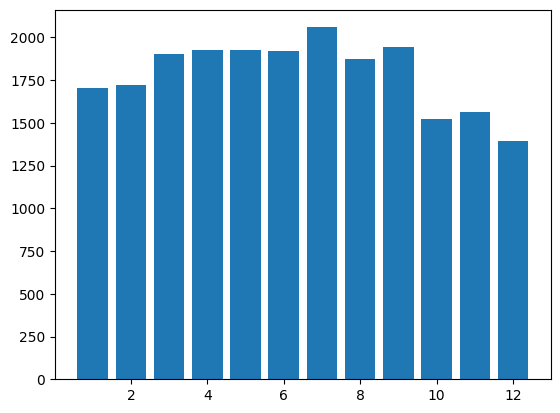

In [44]:
plt.bar(X, Y)
plt.show()

#### Conclusion

El indice de accidentes se ve pronunciado en el año de 2017 con un especial enfasis a lo largo de todos los años en los mes de mitad de año, entre julio y septiembre.

### Incidentes por ruta

In [47]:
X = df['Route'].unique()

In [46]:
#Se realiza conteo de incidentes por ruta
Y = df.groupby(["Route"])["Incident Event Type"].count()

In [48]:
#Devido a que en la grafica no se logra apreciar bien, se ordenan las rutas por los valores y se muestran en fromato tabla
display(Y.sort_values())

Route
467       1
N171      1
N113      1
N381      1
404       1
       ... 
24      140
73      144
18      170
55      171
OOS     304
Name: Incident Event Type, Length: 611, dtype: int64

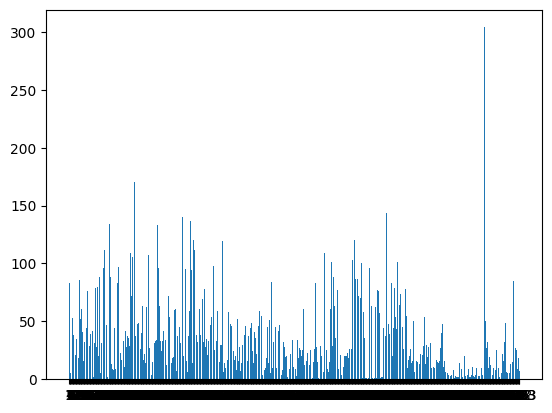

In [49]:
plt.bar(X, Y)
plt.show()

#### Conclusion

Se ve un claro pronunciamiento en el nivel de accidentes sobre la ruta '00S', por lo que se deveria revisar la asignacion de vuelos en la misma.

### Empresa de vuelo con mayor incidente



In [78]:
X = df.groupby(['Year', 'Operator'])["Incident Event Type"].count()

In [71]:
X = X.unique()

In [80]:
Y = df.groupby(['Operator', 'Year'])["Incident Event Type"].count()

In [84]:
print(Y.sort_values())

Operator              Year
Uno Buses             2017      1
Sullivan Bus & Coach  2018      1
Sullivan Buses        2016      2
TGM GROUP             2017      6
H R Richmond          2017     13
                             ... 
East London           2016    757
Metroline             2016    787
                      2015    830
                      2017    892
Arriva London North   2017    961
Name: Incident Event Type, Length: 83, dtype: int64


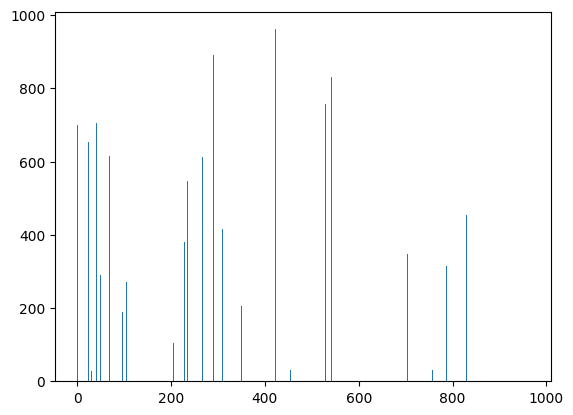

In [82]:
plt.bar(X, Y)
plt.show()

#### Conclusion

Se puedo observar como las aerolineas 'Arriva London North' y 'Metroline' tienen los mayores indices de accidentes, siendo la 'Arriva London North' la que en 2017 tiene el mayor numero de accidentes '961'.
Se debe informar a los encargados de la revision de la misma.
